### Exploring the 'Indicators.csv' 

**source:** https://kaggle.com
**Author**: Enock Agoi email:omusianieno@gmail.com
**python 2.7.6**


In [1]:
import pandas as pd, numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

Exploring :Data Visualization Using Matplotlib and seaborn

In [2]:
#import the csv and create a pandas DataFrame
data = pd.read_csv('Indicators.csv')
data.shape

(5656458, 6)

In [3]:
#lets have a look at our data
data.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


In [4]:
#pick columns
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()
#show all indicators
#indicators
#code = data['CountryCode'].unique().tolist()



In [5]:
#filter 1
yearsFilter = list(range(1981,2016))
#Filter out the countries that belong to the EAC trading block 
#in Africa
comesa = ['Kenya', 'Uganda', 'Tanzania','Rwanda',
          'Burundi','Sudan', 'Ethiopia']


#country filter - pick two countrieas randomly
#contryFilter = random.sample(countries,3)

In [6]:
#create a boolean filter
#TRUE -->> all indicators that begin with electricity
electricity = data['IndicatorName'].str.contains("Electricity")
#TRUE -> the years in question
years = data['Year']>1980
#TRUE if the country in the comesa
countries = data['CountryName'].isin(comesa)
#filter
electricityData = data[electricity&years&countries]
#show our data
electricityData.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1125778,Ethiopia,ETH,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,1981,0.000000
1125779,Ethiopia,ETH,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1981,70.319001
1125780,Ethiopia,ETH,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,1981,0.000000
1125781,Ethiopia,ETH,Electricity production from nuclear sources (%...,EG.ELC.NUCL.ZS,1981,0.000000
1125782,Ethiopia,ETH,Electricity production from oil sources (% of ...,EG.ELC.PETR.ZS,1981,29.680999
1125783,Ethiopia,ETH,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1981,29.680999
1125784,Ethiopia,ETH,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1981,0.000000
1125785,Ethiopia,ETH,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,1981,0.000000
1139272,Kenya,KEN,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,1981,0.000000
1139273,Kenya,KEN,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1981,74.736842


we have extracted **electricity data** from these East african Countries.
Exploring the data even more,

In [7]:
#now that we nave obtained our electricity data we look at the countries captured
country = electricityData['CountryName'].unique().tolist()
#lets see them

country


['Ethiopia', 'Kenya', 'Sudan', 'Tanzania']

we observe that only the four are captured in our dataset: Well just use these Four for our analysis

In [8]:
#lets now see our obtained indicators 
indicators = electricityData['IndicatorName'].unique().tolist()
indicators

['Electricity production from coal sources (% of total)',
 'Electricity production from hydroelectric sources (% of total)',
 'Electricity production from natural gas sources (% of total)',
 'Electricity production from nuclear sources (% of total)',
 'Electricity production from oil sources (% of total)',
 'Electricity production from oil, gas and coal sources (% of total)',
 'Electricity production from renewable sources, excluding hydroelectric (% of total)',
 'Electricity production from renewable sources, excluding hydroelectric (kWh)']

### Research Question:Electrical Power in East Africa: Sources, Renewable Energy and Comparison to  the Rest of Africa

In [9]:
## have a look at the history of renewable energy(w/o) hydro
#True for the last indicator
green = electricityData['IndicatorName'].str.contains("kWh")
#filter
GreenElec = electricityData[green]
#have a look
GreenElec.head(5)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1125785,Ethiopia,ETH,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,1981,0.0
1139279,Kenya,KEN,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,1981,146000000.0
1166062,Sudan,SDN,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,1981,0.0
1168747,Tanzania,TZA,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,1981,0.0
1210392,Ethiopia,ETH,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,1982,0.0


Text(0.5,1,u'Electricity from Renewable sources(Not Hydro)in East Africa')

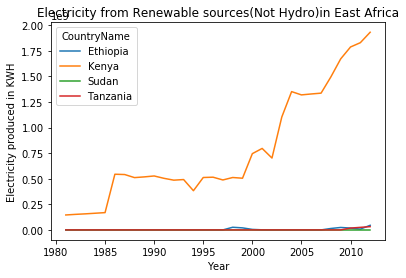

In [10]:
##plot of the historical production of Electricity in the four countries(renewable sources only
pivoted = pd.pivot_table(GreenElec, values='Value',columns='CountryName',index='Year')
plt.figure(figsize=(16,16))
pivoted.plot()

plt.ylabel("Electricity produced in KWH")
plt.title("Electricity from Renewable sources(Not Hydro)in East Africa")



In matters **renewable energy** production, **Kenya** has led the way over the years.Other  countries lag way behind.

Now lets look at the trends in perectages of the total energy


In [11]:
#remove rows with the kwhs
electricityData_ = electricityData[green==False]
#have alook
electricityData_.head(6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1125778,Ethiopia,ETH,Electricity production from coal sources (% of...,EG.ELC.COAL.ZS,1981,0.000000
1125779,Ethiopia,ETH,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,1981,70.319001
1125780,Ethiopia,ETH,Electricity production from natural gas source...,EG.ELC.NGAS.ZS,1981,0.000000
1125781,Ethiopia,ETH,Electricity production from nuclear sources (%...,EG.ELC.NUCL.ZS,1981,0.000000
1125782,Ethiopia,ETH,Electricity production from oil sources (% of ...,EG.ELC.PETR.ZS,1981,29.680999
1125783,Ethiopia,ETH,"Electricity production from oil, gas and coal ...",EG.ELC.FOSL.ZS,1981,29.680999


Text(0.5,1,u'Trends in sources of Electrical energy in East Africa')

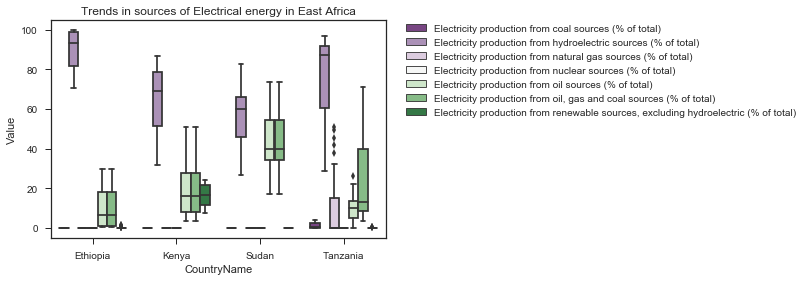

In [12]:
#we'll use a box plot to show us the didpersion of production
#over the years

#i used seaborn for more apealing boxplots :)
sns.set(style="ticks")

graph_= sns.boxplot(x="CountryName",y="Value",data=electricityData_,
            hue="IndicatorName", palette="PRGn")
#graph_.sns.despine(offset=10, trim=True)
#graph_.legend(loc='best')


##place legend outside plot
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
plt.title("Trends in sources of Electrical energy in East Africa")

In all the 4 countries over the years **Hydo Electric power** has been the main source of electricity with petroleum and other fossil fuels following closely

Looking at the Individual countries over the years :the use of HEP as the Main Source of power
is empahasised by the following box plots

c:\python27\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5,0.98,u'Distribution of percentage makeup for each Energy source 1981- To date\n')

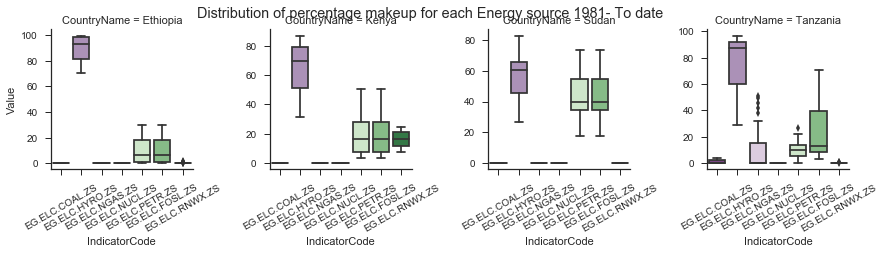

In [13]:
##grid

grid= sns.FacetGrid(data=electricityData_, col="CountryName",
                   sharey=False)

grid.map(sns.boxplot,"IndicatorCode","Value", palette="PRGn")
grid.set_xticklabels(rotation=30)
grid.add_legend()
#
plt.suptitle("Distribution of percentage makeup for each Energy source 1981- To date\n")

Sources like Coal, Natural gas, Nuclear remain largely Unexplored by these countries over the years. Also, only **Kenya** has explored the use of **Renewable Energy that is not HEP** so far

But has the dependance on HEP in this countres increased or reduced over the years?:

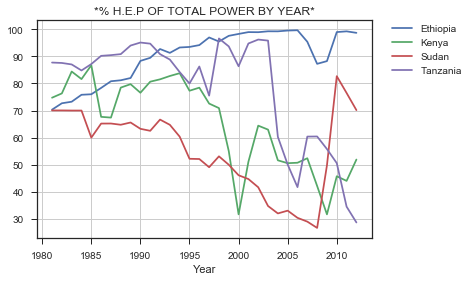

In [14]:
###Get the percentage of HEP in all the 4 countries over the Years
hydro = electricityData['IndicatorName'].str.contains("hydroelectric sources")
hydros = electricityData[hydro]

##create a pivot
pivoted = pd.pivot_table(hydros, values='Value',columns='CountryName',index='Year')
plt.figure(figsize=(10,10))
pivoted.plot(grid=True, title="*% H.E.P OF TOTAL POWER BY YEAR*")

#place legend outside plot for clarity
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

Hydro has been used as the main source of power for most countries until the mid 1990s, with **Kenya and Tanzania** leading in diversification from **circa 2005**

Now let us look at the contribution of each of the **sources** in Eastern Africa since 1981:

In [15]:
#Mean percentegaes over the years
key = ['CountryName','IndicatorCode']
#using groupby
means=electricityData_.groupby(key).mean()
#remove Year column to have sensible data
means_=means.drop(['Year'], axis=1)#.reset_index()

#means_.to_csv('means.csv')
means_.head(5)

Value
CountryName IndicatorCode            
Ethiopia    EG.ELC.COAL.ZS   0.000000
            EG.ELC.FOSL.ZS   9.654002
            EG.ELC.HYRO.ZS  90.181322
            EG.ELC.NGAS.ZS   0.000000
            EG.ELC.NUCL.ZS   0.000000

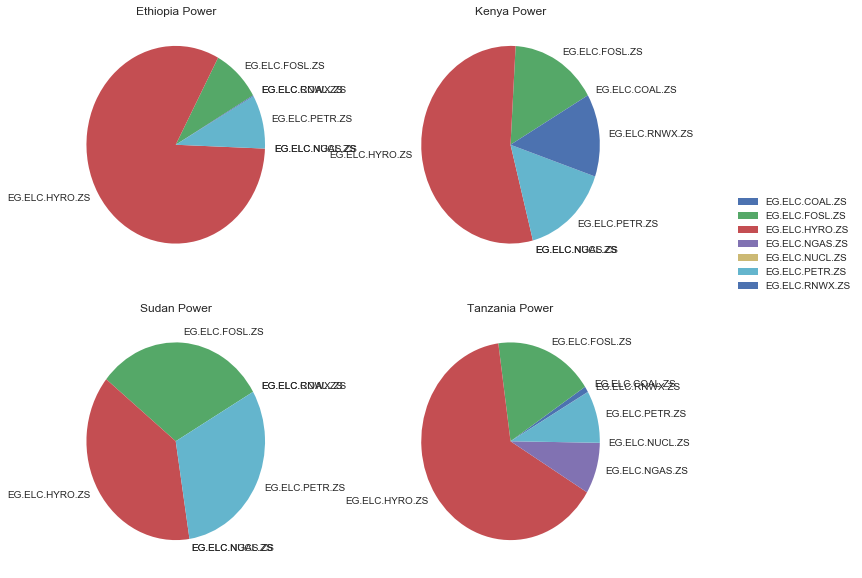

In [16]:
#Draw pie charts
#create a filter #for each country and reset the indices
kenya = means_.loc['Kenya'].reset_index()
ethiopia = means_.loc['Ethiopia'].reset_index()
Sudan = means_.loc['Sudan'].reset_index()
Tanzania=means_.loc['Tanzania'].reset_index()

####initialize
fig, axes = plt.subplots(2,2, figsize=(10,10))

#plot
#Ethiopia
ax= axes[0,0]
ax.pie(ethiopia.Value, labels=ethiopia.IndicatorCode, startangle=30)
ax.set_title('Ethiopia Power')
#Kenya
ax= axes[0,1]
ax.pie(kenya.Value, labels=kenya.IndicatorCode, startangle=30)
ax.set_title('Kenya Power')
#Sudan
ax= axes[1,0]
ax.pie(Sudan.Value, labels=Sudan.IndicatorCode, startangle=30)
ax.set_title('Sudan Power')
#Tanzania
ax= axes[1,1]
ax.pie(Tanzania.Value, labels=Tanzania.IndicatorCode, startangle=30)
ax.set_title('Tanzania Power')

####move legend & adjust space
plt.legend(bbox_to_anchor=(1.5,1.5), loc=2, borderaxespad=0)
fig.subplots_adjust(wspace=.5)


These charts further emphasise our insight earlier, a huge chunk of Electricity has been hydro over the years

Now let us see how Eastern Africa compares to the Rest of Africa in matters Electrical power.

In [17]:
#import necessary module
import folium

In [18]:
#extract data for renewable enerrgy in 2013
##true for 2015
year = data["Year"]==2010
#true->Renewable enery thats not hydro
green = data["IndicatorName"].str.contains("kWh")
greenElec = data[green&year]
# a look at our data
greenElec.head(6)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4839134,Arab World,ARB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2010,2.318678e+03
4839143,Arab World,ARB,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,2010,2.514000e+09
4839682,Caribbean small states,CSS,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,2010,1.800000e+08
4840234,Central Europe and the Baltics,CEB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2010,4.012911e+03
4840243,Central Europe and the Baltics,CEB,"Electricity production from renewable sources,...",EG.ELC.RNWX.KH,2010,1.765200e+10
4840898,East Asia & Pacific (all income levels),EAS,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2010,3.062994e+03


In [19]:
#filter out the data even further
map_data = greenElec[['CountryCode','Value']]
map_data.head()

,CountryCode,Value
4839134,ARB,2.318678e+03
4839143,ARB,2.514000e+09
4839682,CSS,1.800000e+08
4840234,CEB,4.012911e+03
4840243,CEB,1.765200e+10


In [20]:
##set up our map
map_ = folium.Map(location=[100,0],zoom_start=2)
geo_string = ('world-countries.json')
legend=greenElec.iloc[0]['IndicatorName']

In [21]:
map_.choropleth(geo_data=geo_string,data=map_data,
               columns=['CountryCode','Value'],
               key_on='feature.id',
               fill_color='YlGnBu',
               fill_opacity=0.8, line_opacity=0.2,
               legend_name=legend)

In [22]:
#create plot
map_.save('green_data.html')

In [23]:
##import the interactive html
from IPython.display import HTML
HTML('<iframe src=green_data.html width=700 height=450></iframe>')

### Now let us look at dependancy on HEP

In [24]:
#pull data for %in hydros
hydro = data['IndicatorName'].str.contains("hydroelectric sources")

year = data["Year"]==2010

hydroElec = data[hydro&year]
# a look at our data
hydroElec.head(6)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4839137,Arab World,ARB,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,2010,3.535976
4840237,Central Europe and the Baltics,CEB,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,2010,11.311874
4840901,East Asia & Pacific (all income levels),EAS,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,2010,12.982717
4841564,East Asia & Pacific (developing only),EAP,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,2010,16.321745
4842356,Euro area,EMU,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,2010,11.244588
4842987,Europe & Central Asia (all income levels),ECS,Electricity production from hydroelectric sour...,EG.ELC.HYRO.ZS,2010,16.310922


In [25]:
#set up our map
legend1=hydroElec.iloc[0]['IndicatorName']
map1 = folium.Map(location=[100,0],zoom_start=2)

In [26]:
map1.choropleth(geo_data=geo_string,data=hydroElec,
               columns=['CountryCode','Value'],
               key_on='feature.id',
               fill_color='YlGnBu',
               fill_opacity=0.8, line_opacity=0.8)

In [28]:
#create plot
map1.save('hydro_data1.html')

In [29]:
#show our map
HTML('<iframe src=hydro_data.html width=700 height=450></iframe>')

Evidently, the dependance on HEP in eastern Africa is high. Development of 'green' energy was still a long way to go as at 2011